In [1]:
# Import Libraries
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [4]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets...", end = "")

    # Downloading zip file using urllip package
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the ZipFile package
        with ZipFile(save_path) as z:
            # Extract Zip file contents in the same directory
            z.extractall(os.path.split(save_path)[0])

        print("Done")
    except Exception as e:
        print("\nInvalid file", e)

In [5]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB6.zip")

# Download if asset Zip does not exist
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [6]:
# Read video from source
source = 'race_car.mp4' # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [7]:
if not cap.isOpened():
    print("Error opening video stream or file")

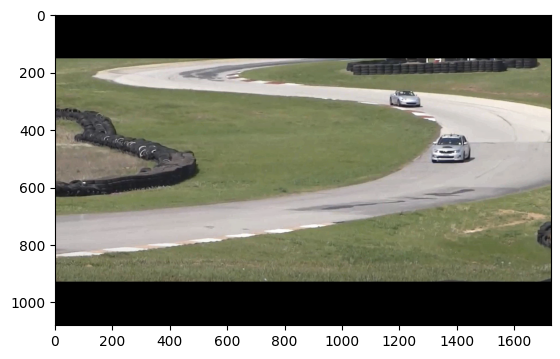

In [8]:
# Read and display one frame
ret, frame = cap.read()

plt.imshow(frame[..., ::-1])
plt.show()

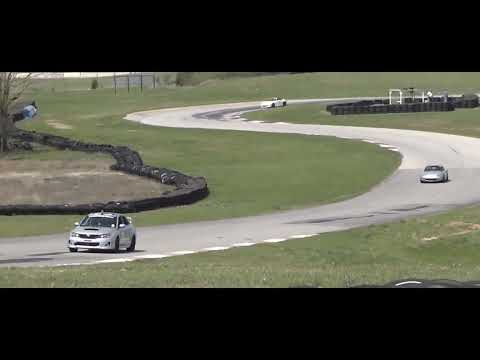

In [9]:
# Display the video
video = YouTubeVideo("RwxVEjv78LQ", width = 700, height = 438)
display(video)

In [10]:
# Write video using OpenCV
# Default resolutions of the frame are obtained
# Convert the resolutions from float to integer

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

In [ ]:
# Read frames and write to file
# Read until the video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [ ]:
# When everything is done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

In [ ]:
# Installing ffmpeg
!apt-get -qq install ffmpeg

In [ ]:
# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i "/content/ract_car_out.mp4" -c:v libx264 "race_car_out_x264.mp4" -hide_banner -loglevel error

In [ ]:
# Render mp4 video
mp4 = open("/content/race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4; base64," + b64encode(mp4).decode()

HTML(f"""<video width = 700 controls><source src = "{data_url}" type = "video/mp4"></video>""")